In [1]:
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

if gpu_available:
    # Get the name of the GPU device
    gpu_name = tf.test.gpu_device_name()
    print(f'GPU device name: {gpu_name}')
else:
    print('GPU not available. Running on CPU.')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU device name: /device:GPU:0


In [2]:
import tensorflow as tf
import time

# Check if GPU is available
gpu_available = tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

if gpu_available:
    # Create a sample computation on GPU
    with tf.device('/GPU:0'):
        start_time = time.time()

        # Example task: matrix multiplication on GPU
        A = tf.random.normal([1000, 1000])
        B = tf.random.normal([1000, 1000])
        C = tf.matmul(A, B)

        end_time = time.time()

    # Calculate and print the elapsed time
    elapsed_time = end_time - start_time
    print(f'Time taken on GPU: {elapsed_time:.4f} seconds')
else:
    print('GPU not available. Please check your runtime settings.')


Time taken on GPU: 0.2195 seconds


In [3]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [25]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten,Dropout

import random
random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

label : 5


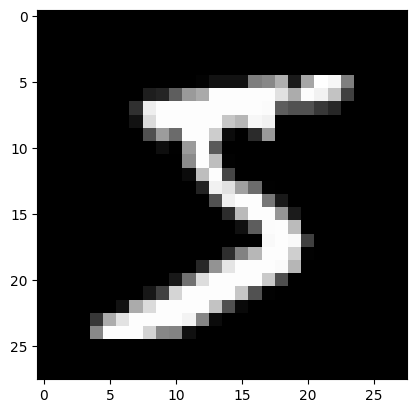

In [6]:
print("label :",y_train[0])
plt.imshow(x_train[0],cmap='gray')

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
x_train.shape[0]

60000

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
# now we want to normalize our data so that it should be in range from 0 and 1
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [13]:
print('X_train shape',x_train.shape)
print('Images in x_train:',x_train.shape[0])
print('x_test shape',x_test.shape)
print('Images in x_test',x_test.shape[0])
print('max values in x_train',x_train.max())
print('min values in x_test',x_train.min())
print('max values in x_test',x_test.max())

X_train shape (60000, 28, 28, 1)
Images in x_train: 60000
x_test shape (10000, 28, 28, 1)
Images in x_test 10000
max values in x_train 1.0
min values in x_test 0.0
max values in x_test 1.0


In [14]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

print('shape of y_train',y_train.shape)
print('One value of y_train',y_train.shape[0])

shape of y_train (60000, 10)
One value of y_train 60000


In [15]:
# Building convolutional neural network
# combining two ideas of convolutional neural network and fully connected network

In [16]:
model = Sequential()

# Add first convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add second convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))  # Corrected kernel_size here

# Flatten the 2D feature maps to 1D
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Print model summary to check the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2370282 (9.04 MB)
Trainable params: 2370282 (9.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# now we are going to compile and then fit

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with your data
H = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 12s 5ms/step - loss: 0.1353 - accuracy: 0.9596 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0549 - val_accuracy: 0.9832
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0223 - accuracy: 0.9927 - val_loss: 0.0707 - val_accuracy: 0.9801
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0727 - val_accuracy: 0.9831
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0693 - val_accuracy: 0.9844
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0657 - val_accuracy: 0.9860
Epoch 7/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0632 - val_accuracy

In [19]:
loss ,acc =model.evaluate(x_test,y_test)
print("Test accuracy:%1.f%%"%(100.0*acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0668 - accuracy: 0.9861
Test accuracy:99%


In [20]:
loss ,acc =model.evaluate(x_train,y_train)
print("Training accuracy:%1.f%%"%(100.0*acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9943
Training accuracy:99%


In [22]:
H.history

{'loss': [0.1352774053812027,
  0.04055146127939224,
  0.022341957315802574,
  0.014731108210980892,
  0.012519719079136848,
  0.00860560592263937,
  0.006865551695227623,
  0.005631905514746904,
  0.006259245332330465,
  0.005359929986298084],
 'accuracy': [0.9596190452575684,
  0.9875714182853699,
  0.9927142858505249,
  0.9951428771018982,
  0.9957619309425354,
  0.9973095059394836,
  0.9975952506065369,
  0.9982380867004395,
  0.9980238080024719,
  0.9984999895095825],
 'val_loss': [0.06806574016809464,
  0.05490029603242874,
  0.07072996348142624,
  0.0727447122335434,
  0.06933671236038208,
  0.06568005681037903,
  0.06324154138565063,
  0.0794978067278862,
  0.08975883573293686,
  0.08912341296672821],
 'val_accuracy': [0.980222225189209,
  0.983222246170044,
  0.9801111221313477,
  0.9831110835075378,
  0.9844444394111633,
  0.9860000014305115,
  0.9865555763244629,
  0.9847777485847473,
  0.9832777976989746,
  0.9845555424690247]}

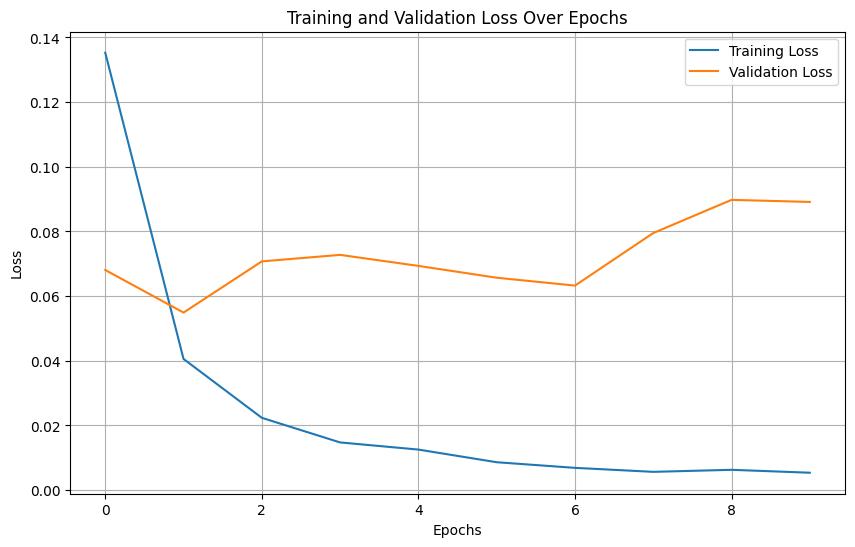

In [21]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
 model = Sequential()

# Add first convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))

# Add second convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))  # Corrected kernel_size here
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))  # Output layer with 10 units for 10 classes

# Print model summary to check the architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                      

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback=tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2,min_delta=0.01)
H=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_split=0.2,callbacks=[callback])

Epoch 1/10
1500/1500 [==============================] - 11s 5ms/step - loss: 0.1440 - accuracy: 0.9558 - val_loss: 0.0555 - val_accuracy: 0.9840
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0324 - accuracy: 0.9894 - val_loss: 0.0417 - val_accuracy: 0.9871


In [28]:
loss ,acc =model.evaluate(x_test,y_test)
print("Test accuracy:%1.f%%"%(100.0*acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.0356 - accuracy: 0.9892
Test accuracy:99%


In [29]:
loss ,acc =model.evaluate(x_train,y_train)
print("Training accuracy:%1.f%%"%(100.0*acc))

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0216 - accuracy: 0.9930
Training accuracy:99%


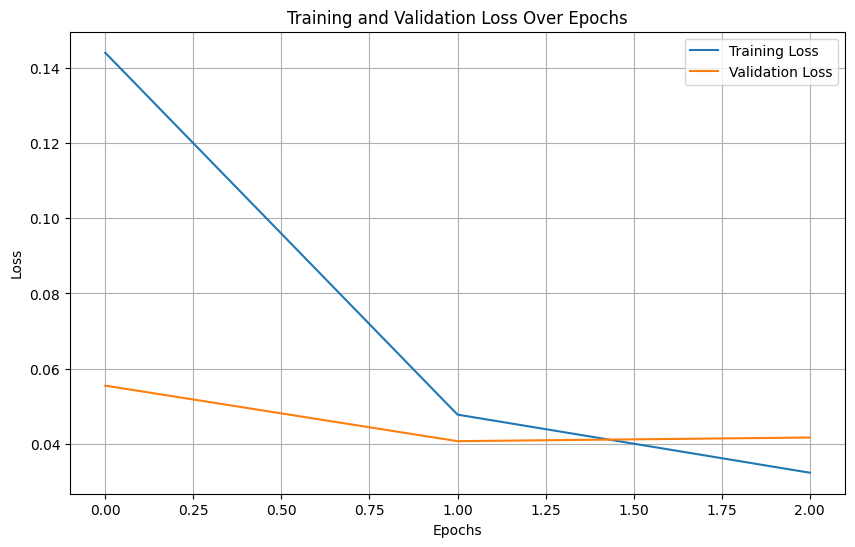

In [30]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 21ms/step
Predicted label: 4
Softmax Output [[1.4548156e-07 2.5083311e-06 8.2679968e-08 1.0742116e-07 9.9983037e-01
  6.1736665e-07 1.1039667e-07 2.7434580e-06 1.4836488e-04 1.4969510e-05]]


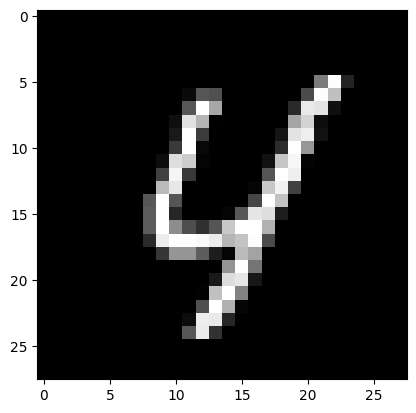

In [35]:
plt.imshow(x_test[555].reshape(28,28),cmap='gray')
y_pred=model.predict(x_test[555].reshape(1,28,28,1))
print('Predicted label:',y_pred.argmax())
print('Softmax Output',y_pred)
